<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Flkr_g_15_20k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 5.5 MB/s 
     |████████████████████████████████| 41 kB 174 kB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
     |████████████████████████████████| 4.5 MB 48.2 MB/s 
     |████████████████████████████████| 832 kB 44.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.6 MB 51.1 MB/s 


# **Import**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel
import seaborn as sb

matplotlib.rcParams['figure.figsize'] = (15,8)
sb.set_style('darkgrid')

# code

In [5]:
df = pd.read_csv('kepler_quarter_9.csv')

In [6]:
df_test = df[15000:20000]



In [7]:
from google.colab import files

In [8]:
flr_list = []
logg_list = []
for id in df_test['Dataset Name']:
  name    = id[:13]
  try:
    source  = lk.search_lightcurve(name, author="Kepler", cadence="long",quarter = 9).download()
  except :
    print("Crashed!")
    sample=pd.DataFrame(zip(flr_list, df_test['Log G'].values), columns=['Flkr','Log G'])

    s2 = sample[sample['Flkr']<0.1]
    s2.to_csv('data.csv')
    flr = sample['Flkr']
    flr.to_csv('Flicker.csv')
    files.download('Flicker.csv')
    files.download('data.csv')
    break 
  rem_out = source.remove_outliers(sigma_upper = 2.5).normalize()

  pg      = rem_out.to_periodogram(normalization='psd')
  seismo  = pg.flatten().to_seismology() 
  seismo.estimate_numax() 
  logg = seismo.estimate_logg()

  logg_list.append(logg.value)   


  index=50
  ind=250            
  flux    = rem_out.flux.value
  time    = rem_out.time.value
  smoothed_signal = convolve(flux, Box1DKernel(16))
  flkr    = flux[index:-ind]-smoothed_signal[index:-ind]
  flr     = np.sqrt(np.mean(flkr**2))*1e3

  flr_list.append(flr)

In [10]:
flkr_g=pd.DataFrame(zip(flr_list, df_test['Log G'].values), columns=['Flkr','Log G'])
flkr_g_pone = flkr_g[flkr_g['Flkr']<0.1]
flkr_g_pone

,Flkr,Log G
4,0.096194,4.316
31,0.090533,4.376
111,0.096071,4.034
126,0.065213,4.338
128,0.079915,4.326
...,...,...
4811,0.089962,4.048
4824,0.071290,4.288
4866,0.073847,3.987
4903,0.082891,4.046


In [11]:
flkr_g_pone.to_csv('f8_g_15kto20k_<0.1.csv')

In [12]:
df_test['flicker']= flr_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
flkr_g.to_csv('f8_g_15kto20k.csv')
flkr_g

,Flkr,Log G
0,0.426933,4.816
1,0.475875,4.452
2,0.553015,4.673
3,0.183268,3.559
4,0.096194,4.316
...,...,...
4995,0.835320,4.690
4996,0.634870,4.505
4997,0.275063,4.685
4998,0.211690,4.143


(5.2, 2.0)

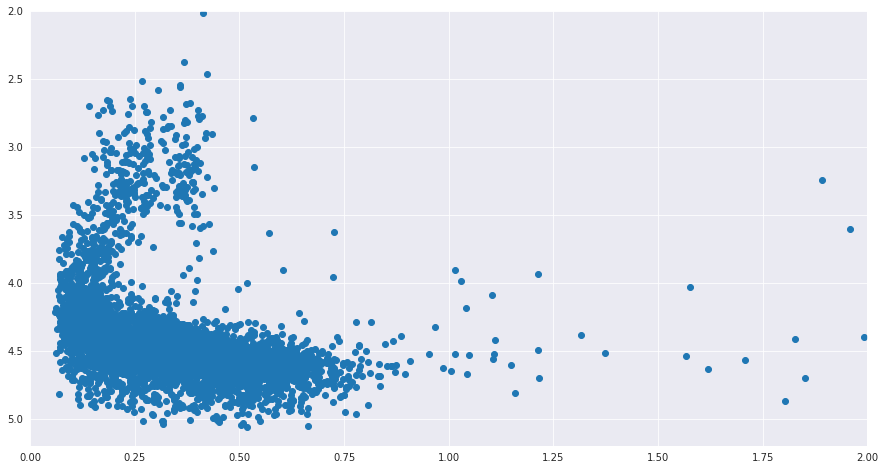

In [14]:
x = df_test['flicker']
y = df_test['Log G']

plt.scatter(x,y)
plt.xlim(0,2)
plt.ylim(5.2, 2)

(5.0, 3.5)

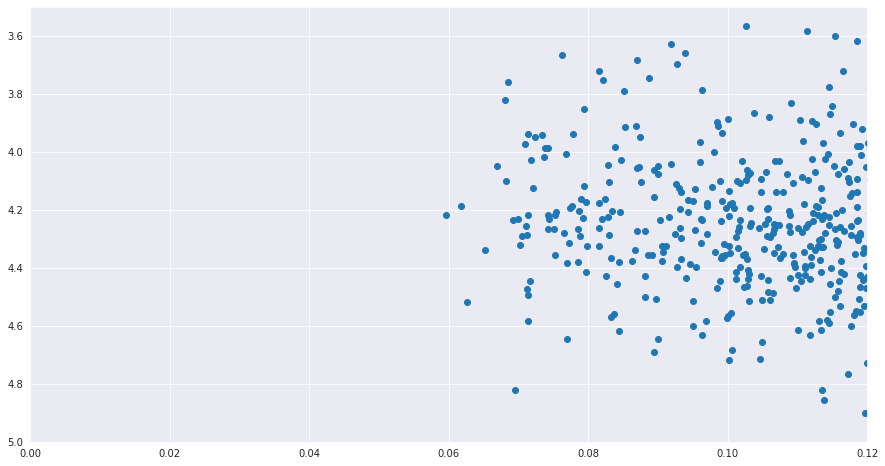

In [15]:
x = flkr_g['Flkr']
y = flkr_g['Log G']

plt.scatter(x,y)
plt.xlim(0,.12)
plt.ylim(5,3.5)